# Import the needed Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [4]:
df = pd.read_csv(r'../raw_data/bank_data_C.csv')

In [5]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


### _Viewing the `shape` of the dataset_

In [7]:
df.shape

(1041614, 9)

### Cheking if there are mising values within the datset, and also the datatypes of the columnsm

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionTime          1041614 non-null  int64  
 8   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 71.5+ MB


### 🗃️ Datatype Conversion
We converted the following columns from `object` to `datetime` format to enable accurate time-based analysis:
- `CustomerDOB` → `datetime`
- `TransactionDate` → `datetime`
This ensures proper handling of date operations such as filtering, sorting, and time-series analysis.

In [11]:
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], errors='coerce')
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')

In [12]:
# verify the columns are converted now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1041614 non-null  object        
 1   CustomerID               1041614 non-null  object        
 2   CustomerDOB              1041614 non-null  datetime64[ns]
 3   CustGender               1041614 non-null  object        
 4   CustLocation             1041614 non-null  object        
 5   CustAccountBalance       1041614 non-null  float64       
 6   TransactionDate          1041614 non-null  datetime64[ns]
 7   TransactionTime          1041614 non-null  int64         
 8   TransactionAmount (INR)  1041614 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 71.5+ MB


In [13]:
df.isna().sum()  # verifying any missing value

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

_This shows that there are no missing values in the dataset._

---

In [15]:
df.duplicated().sum()  # checking for any duplicate

0

In [16]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5


### Normalising the `CustomerDOB` column from dates that are beyond current date

In [18]:
def normaliseDOB(df, col = 'CustomerDOB'):
    today = datetime.today()
    df.loc[df[col] > today, col] = df.loc[df[col] > today, col] - pd.DateOffset(years=100)
    return df

In [19]:
df = normaliseDOB(df, 'CustomerDOB')

#### 🧹 Cleaning Future-Dated Birth Entries
To ensure data integrity, we normalized the `CustomerDOB` column by correcting any birth dates that were erroneously recorded beyond the current date. These future-dated entries may result from input errors or system glitches and can distort age-based analyses.

This step helps maintain accurate demographic insights and prevents downstream issues in age calculations or segmentation.

---

In [21]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5


### 🧠 Feature Engineering: Adding `CustomerAge`
To enhance the dataset's analytical value, we introduced a new feature `CustomerAge`. This column was derived by calculating the age of each customer based on their date of birth (`CustomerDOB`) and the transaction date.

Including `CustomerAge` enables more insightful segmentation, trend analysis, and predictive modelling based on age-related behaviour.

In [23]:
today = date.today()
formatted_date = today.strftime('%Y-%m-%d')
formatted_date = pd.to_datetime(formatted_date)
print(formatted_date)

2025-10-15 00:00:00


In [24]:
df['CustomerAge'] = (formatted_date - df['CustomerDOB']).dt.days //365

In [25]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,31
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,68
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,28
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,52
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,37


In [26]:
df.drop(columns='CustomerDOB', inplace=True, axis=1) # here the 'CustomerDOB' column is dropped

In [27]:
df.head(2)

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
0,T1,C5841053,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,31
1,T2,C2142763,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,68


### ⏱️ Timestamp Formatting: Transforming raw timestamps into string-based time format

In [29]:
df['TransactionTime'] = df['TransactionTime'].apply(
    lambda x: datetime.strptime(str(x).zfill(6), "%H%M%S").strftime("%H:%M:%S"))

Here, I converted timestamp values into human-readable time strings to simplify interpretation and support time-based grouping or display. This transformation enables clearer insights when analysing or presenting time-specific data.

---

In [31]:
df.head(2)

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
0,T1,C5841053,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0,31
1,T2,C2142763,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.0,68


### 🔗 Concatenating into a single column both `TransactionDate` and `TransactionTime`
Here, I merged the `TransactionDate` and `TransactionTime` columns into a single datetime column to streamline temporal analysis. This unified timestamp simplifies filtering, sorting, and time-based computations across the dataset.

In [33]:
df['Transaction_Date_Time'] = df['TransactionDate'].astype(str) + ' ' + df['TransactionTime'].astype(str)

In [34]:
df.head(2)

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge,Transaction_Date_Time
0,T1,C5841053,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0,31,2016-02-08 14:32:07
1,T2,C2142763,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.0,68,2016-02-08 14:18:58


### 📊 Descriptive Statistics Overview

In [36]:
df.describe(include='all')

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge,Transaction_Date_Time
count,1041614,1041614,1041614,1041614,1.041614e+06,1041614,1041614,1.041614e+06,1.041614e+06,1041614
unique,1041614,879358,3,9275,NaN,NaN,81855,NaN,NaN,873447
top,T1,C5533885,M,MUMBAI,NaN,NaN,20:27:38,NaN,NaN,2016-01-09 11:32:50
freq,1,6,760978,101997,NaN,NaN,46,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,1.149986e+05,2016-07-25 19:23:05.559718400,NaN,1.566096e+03,4.986058e+01,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,2016-01-08 00:00:00,NaN,0.000000e+00,0.000000e+00,NaN
25%,NaN,NaN,NaN,NaN,4.728140e+03,2016-06-09 00:00:00,NaN,1.600000e+02,3.400000e+01,NaN
50%,NaN,NaN,NaN,NaN,1.676852e+04,2016-08-20 00:00:00,NaN,4.575000e+02,3.800000e+01,NaN
75%,NaN,NaN,NaN,NaN,5.742885e+04,2016-09-09 00:00:00,NaN,1.200000e+03,4.500000e+01,NaN
max,NaN,NaN,NaN,NaN,1.150355e+08,2016-12-09 00:00:00,NaN,1.560035e+06,2.250000e+02,NaN


I Performed descriptive statistical analysis to explore key characteristics of the dataset. This step helps summarize central tendencies, variability, and distribution patterns across relevant features.

These insights provide a foundational understanding for deeper exploratory and predictive analysis.

---

In [38]:
df['CustGender'].value_counts()

CustGender
M    760978
F    280635
T         1
Name: count, dtype: int64

### 🧼 Standardizing Gender Entries: Correcting the inconsistency noticed in the `Customer Gender` column

Here, I addressed inconsistencies in the `CustomerGender` column by standardising values across the dataset. This involved correcting typos, harmonising variations (e.g., "M", "Male", "male" → "Male"), and ensuring uniform representation for accurate grouping and analysis.

Consistent gender labels improve the reliability of demographic segmentation and support clearer visualisations and reporting.

In [40]:
def correctCustGender(x):
    if x == 'M':
        return x
    elif x == 'F':
        return x
    else:
        return 'M'

In [41]:
df['CustGender'] = df['CustGender'].apply(correctCustGender)

In [42]:
print(df['CustGender'].unique())

['F' 'M']


### 🧠 Feature Engineering: Creating `AgeGroup`

To enhance demographic analysis, I introduced a new column, `AgeGroup` by categorising customers based on their calculated age. This segmentation allows for clearer insights into behavioural patterns across different age brackets.

#### Example Age Group Bins:
- 18–38: Young Adults  
- 26–59: Adult  
- 36–80: Old Adult 
- 81+: Elder  

This feature supports targeted marketing, customer profiling, and age-based trend analysis.

In [44]:
def ageGroup(x):
    if x <= 38:
        return 'Young Adult'
    elif x <= 59:
        return 'Adult'
    elif x <= 80:
        return 'Old Adult'
    else:
        return 'Elder'
    

In [45]:
df['CustAgeGroup'] = df['CustomerAge'].apply(ageGroup)

In [46]:
df.head()

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge,Transaction_Date_Time,CustAgeGroup
0,T1,C5841053,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0,31,2016-02-08 14:32:07,Young Adult
1,T2,C2142763,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.0,68,2016-02-08 14:18:58,Old Adult
2,T3,C4417068,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0,28,2016-02-08 14:27:12,Young Adult
3,T4,C5342380,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.0,52,2016-02-08 14:27:14,Adult
4,T5,C9031234,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5,37,2016-02-08 18:11:56,Young Adult


In [47]:
df['CustomerAge'].max()

225

In [48]:
df['CustomerAge'].min()

0

### 🧹 Filtering Unrealistic Age Values

To maintain data quality and ensure meaningful demographic analysis, I removed records where `CustomerAge` falls outside the realistic range:

- Ages **below 18** (likely minors or data entry errors)
- Ages **above 110** (potential outliers or incorrect birth dates)

This step helps prevent skewed insights and supports more accurate segmentation and modelling.

In [50]:
below_18 = df[df['CustomerAge'] < 18]
below_18.shape

(188, 11)

In [51]:
above_110 = df[df['CustomerAge'] >110]
above_110.shape

(56292, 11)

In [52]:
df.shape

(1041614, 11)

In [53]:
df.drop(df[df['CustomerAge'] < 18].index, inplace=True, axis=0)
df.drop(df[df['CustomerAge'] >110].index, inplace=True, axis=0)

In [54]:
df.shape

(985134, 11)

In [55]:
df[df['CustomerAge'] < 18]

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge,Transaction_Date_Time,CustAgeGroup


In [56]:
df[df['CustomerAge'] >110]

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge,Transaction_Date_Time,CustAgeGroup


In [57]:
df.head()

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge,Transaction_Date_Time,CustAgeGroup
0,T1,C5841053,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0,31,2016-02-08 14:32:07,Young Adult
1,T2,C2142763,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.0,68,2016-02-08 14:18:58,Old Adult
2,T3,C4417068,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0,28,2016-02-08 14:27:12,Young Adult
3,T4,C5342380,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.0,52,2016-02-08 14:27:14,Adult
4,T5,C9031234,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5,37,2016-02-08 18:11:56,Young Adult


In [58]:
df.to_csv("C:/Users/user/Desktop/retail banking/preprocessed_data/preprocessed_df_02.csv", index=False)

### 🔍 Performing Exploratory Data Analysis (EDA)

I initiated exploratory data analysis to uncover patterns in the dataset. This phase provides foundational insights that guide feature engineering, modelling, and business strategy.

#### Key Objectives:
- Visualize relationships between key variables
- Segment data by relevant dimensions (e.g., age, gender, transaction type)

This helps transform raw data into actionable knowledge and sets the stage for deeper analytical modeling.

`Top 10 performing Locations by Transaction Count` and `Leading 10 Locations by Transaction Volume`

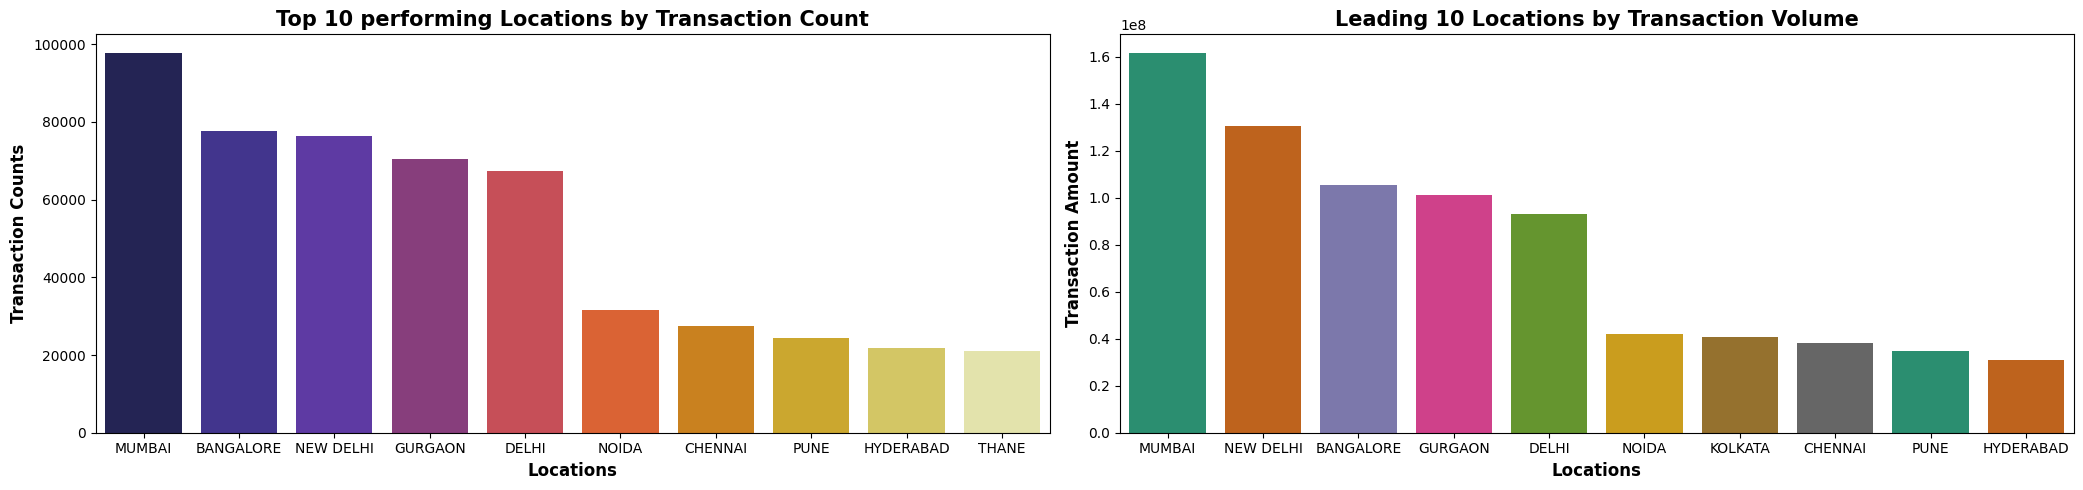

In [61]:
# Top 10 performing Locations by Transaction Count
loc_by_trans = df.groupby('CustLocation')['TransactionID'].count().reset_index()
top_10_loc_by_trans = loc_by_trans.sort_values('TransactionID', ascending=False)
top_10_loc_by_trans = top_10_loc_by_trans.head(10)

# Leading 10 Locations by Transaction Volume
loc_by_amt = df.groupby('CustLocation')['TransactionAmount (INR)'].sum().reset_index()
top_10_loc_by_amt = loc_by_amt.sort_values('TransactionAmount (INR)', ascending=False)
top_10_loc_by_amt = top_10_loc_by_amt.head(10)

plt.figure(figsize=(21,5))
plt.subplot(1,2,1)
sns.barplot(x='CustLocation', y='TransactionID', data=top_10_loc_by_trans, palette='CMRmap')
plt.title('Top 10 performing Locations by Transaction Count', weight='bold', fontsize='15')
plt.xlabel('Locations', weight='bold', fontsize='12')
plt.ylabel('Transaction Counts', weight='bold', fontsize='12')

plt.subplot(1,2,2)
sns.barplot(x='CustLocation', y='TransactionAmount (INR)', data=top_10_loc_by_amt, palette='Dark2')
plt.title('Leading 10 Locations by Transaction Volume', weight='bold', fontsize='15')
plt.xlabel('Locations', weight='bold', fontsize='12')
plt.ylabel('Transaction Amount', weight='bold', fontsize='12')
plt.tight_layout();

### `Top Customers Ranked by Transaction Sum`

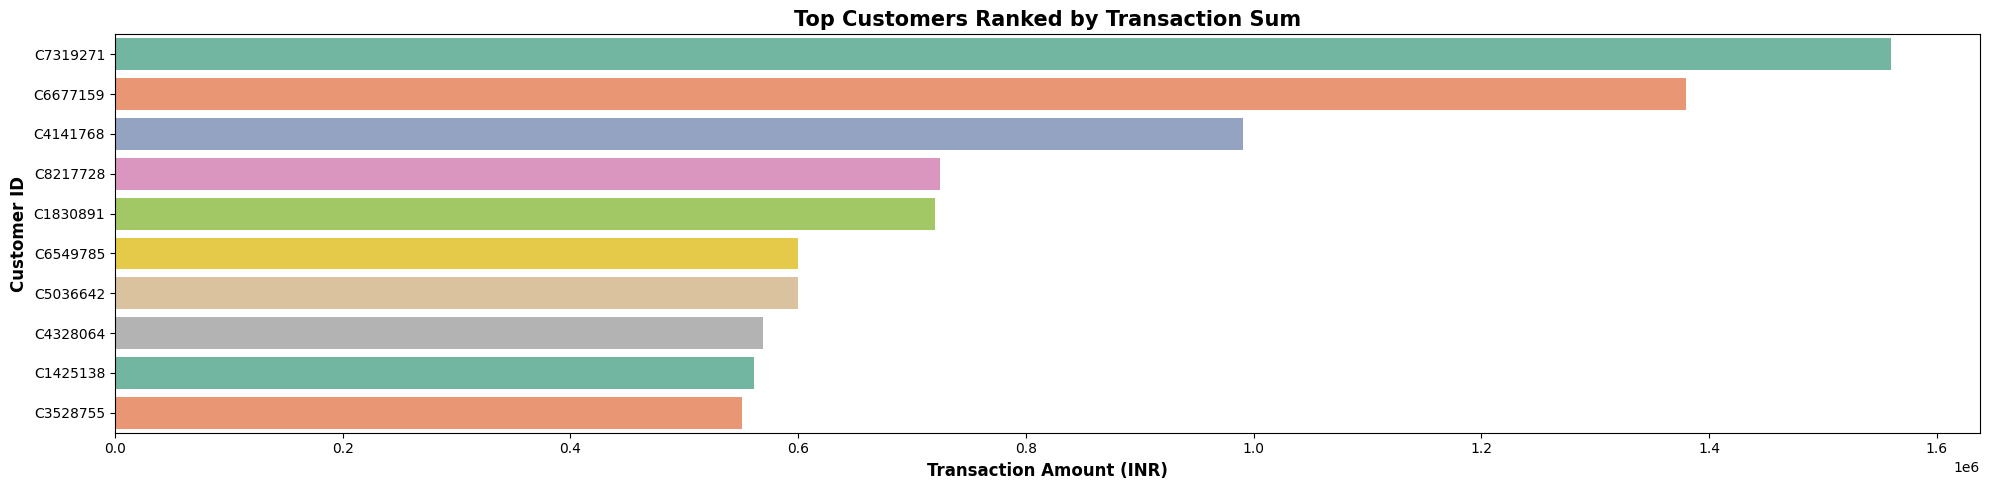

In [63]:
cust_by_amt = df.groupby('CustomerID')['TransactionAmount (INR)'].sum().reset_index()
top_10_cust_by_amt = cust_by_amt.sort_values('TransactionAmount (INR)', ascending=False)
top_10_cust_by_amt = top_10_cust_by_amt.head(10)

plt.figure(figsize=(20,5))
sns.barplot(x='TransactionAmount (INR)', y='CustomerID', data=top_10_cust_by_amt, palette='Set2')
plt.title('Top Customers Ranked by Transaction Sum', weight='bold', fontsize='15')
plt.ylabel('Customer ID', weight='bold', fontsize='12')
plt.xlabel('Transaction Amount (INR)', weight='bold', fontsize='12')
plt.tight_layout()
plt.show()

### `Gender-Based Transaction Analysis`

In [65]:
GenerTransactionVol = df.groupby('CustGender')['TransactionAmount (INR)'].sum().reset_index()
GenerTransactionVol

,CustGender,TransactionAmount (INR)
0,F,4.361919e+08
1,M,9.943717e+08


### `Transaction Counts by Gender`

In [67]:
gender_transaction_count = df['CustGender'].value_counts().reset_index()
gender_transaction_count

,CustGender,count
0,M,712302
1,F,272832


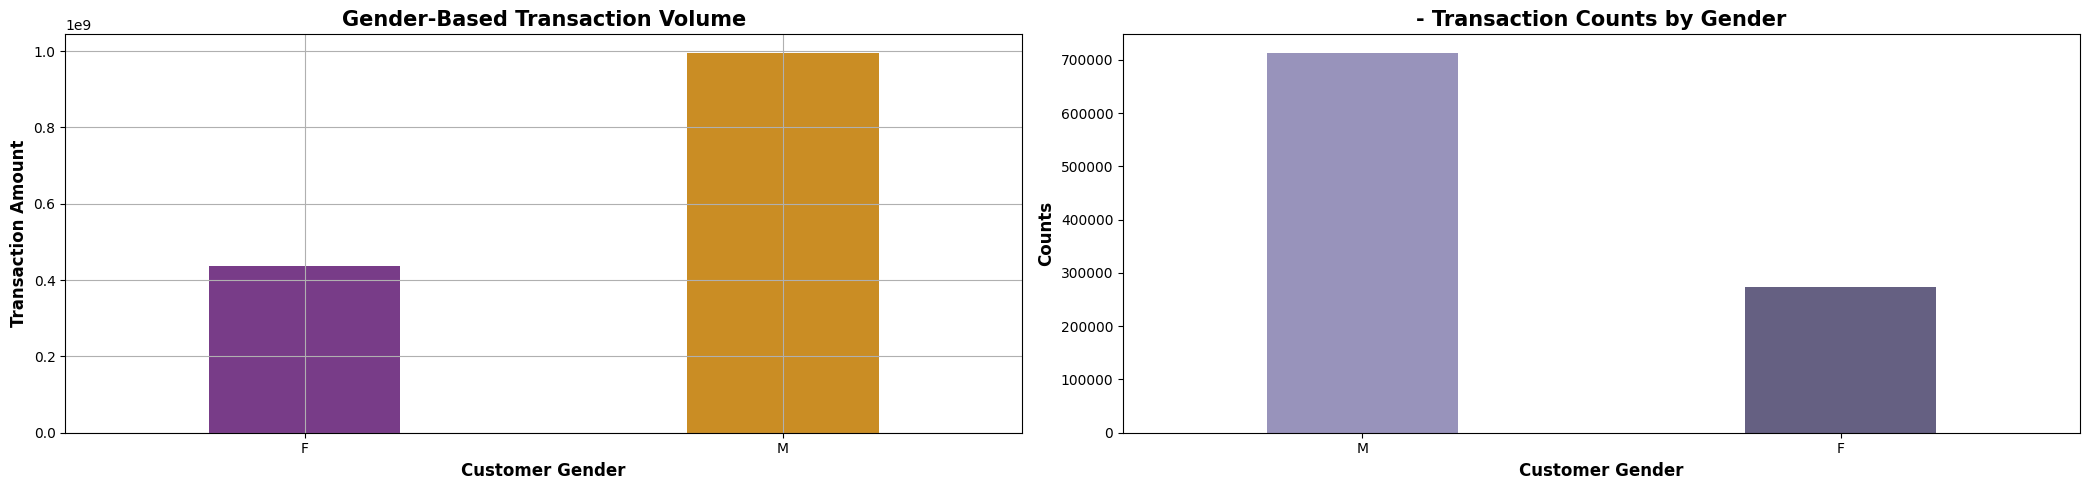

In [96]:
plt.figure(figsize=(21,5))
plt.subplot(1,2,1)
# plt.pie(gender_transaction_count['CustGender'], labels=gender_transaction_count['count'])
sns.barplot(x='CustGender', y='TransactionAmount (INR)', data=GenerTransactionVol, palette='CMRmap', width=0.4)
plt.title('Gender-Based Transaction Volume', weight='bold', fontsize='15')
plt.xlabel('Customer Gender', weight='bold', fontsize='12')
plt.ylabel('Transaction Amount', weight='bold', fontsize='12')

plt.subplot(1,2,2)
sns.barplot(x='CustGender', y='count', data=gender_transaction_count, palette='Purples_d', width=0.4)
plt.title('- Transaction Counts by Gender', weight='bold', fontsize='15')
plt.xlabel('Customer Gender', weight='bold', fontsize='12')
plt.ylabel('Counts', weight='bold', fontsize='12')

plt.tight_layout()
plt.show()

### `Monthly Transaction Patterns`

In [84]:
monthPattern = df.groupby(df['TransactionDate'].dt.to_period('M'))['TransactionAmount (INR)'].sum().reset_index()
monthPattern

,TransactionDate,TransactionAmount (INR)
0,2016-01,5.375421e+07
1,2016-02,5.856847e+07
2,2016-03,6.782119e+07
3,2016-04,7.271519e+07
4,2016-05,6.013530e+07
5,2016-06,6.799314e+07
6,2016-07,6.622034e+07
7,2016-08,5.853416e+08
8,2016-09,2.078602e+08
9,2016-10,6.918623e+07


In [108]:
plt.figure(figsize=(20,10))
plt.plot(monthPattern['TransactionDate'].index.strftime('%Y-%m'), monthPattern['TransactionAmount (INR)'])
#monthPattern['TransactionDate'] = pd.to_datetime(monthPattern['TransactionDate'], format='%Y-%m')
plt.plot(monthPattern['TransactionDate'], monthPattern['TransactionAmount (INR)'], marker='o')

plt.tight_layout()
plt.show()

AttributeError: 'RangeIndex' object has no attribute 'strftime'

<Figure size 2000x1000 with 0 Axes>

### `Transaction Volume by Age Group`

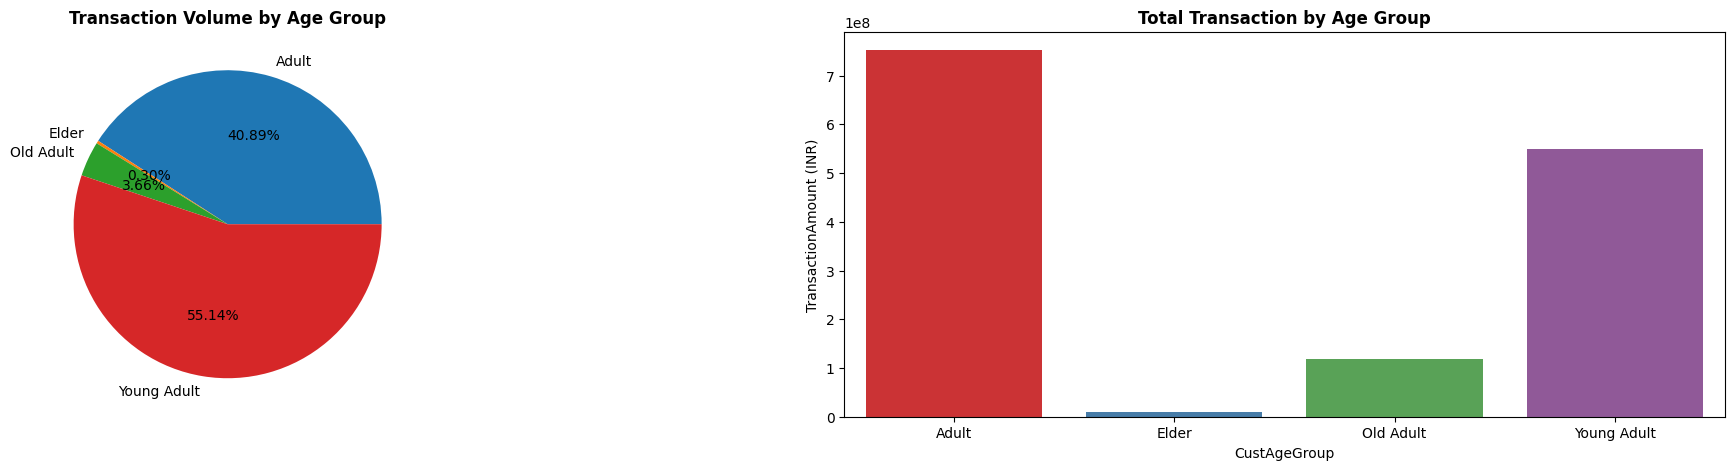

In [111]:
# Transaction Volume by Age Group
ageGrpVol = df.groupby('CustAgeGroup')['TransactionID'].count().reset_index()
ageGrpVol.sort_values('TransactionID', ascending=False)

# Total Transaction by Age Group
ageGrpTotal = df.groupby('CustAgeGroup')['TransactionAmount (INR)'].sum().reset_index()
ageGrpTotal.sort_values('TransactionAmount (INR)', ascending=False)

plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
plt.pie(ageGrpVol['TransactionID'], labels=ageGrpVol['CustAgeGroup'], autopct='%1.2f%%')
plt.title('Transaction Volume by Age Group', weight='bold', fontsize='12')

plt.subplot(1,2,2)
sns.barplot(x='CustAgeGroup', y='TransactionAmount (INR)', data=ageGrpTotal, palette='Set1')
#plt.pie(ageGrpTotal['TransactionAmount (INR)'], labels=ageGrpTotal['CustAgeGroup'], autopct='%1.2f%%')
plt.title('Total Transaction by Age Group', weight='bold', fontsize='12')
plt.show();

### `Total Transaction by Age Group`

In [119]:
ageGrpTotal = df.groupby('CustAgeGroup')['TransactionAmount (INR)'].sum().reset_index()
ageGrpTotal.sort_values('TransactionAmount (INR)', ascending=False)

,CustAgeGroup,TransactionAmount (INR)
0,Adult,7.522977e+08
3,Young Adult,5.491460e+08
2,Old Adult,1.189512e+08
1,Elder,1.016881e+07


In [121]:
df['CustomerAge'].min()

18

In [153]:
df['TransactionDate'].head

<bound method NDFrame.head of 0         2016-02-08
1         2016-02-08
2         2016-02-08
3         2016-02-08
4         2016-02-08
             ...    
1041609   2016-09-18
1041610   2016-09-18
1041611   2016-09-18
1041612   2016-09-18
1041613   2016-09-18
Name: TransactionDate, Length: 985134, dtype: datetime64[ns]>